## Standard imports

In [2]:
import math

import numpy as np
import pandas as pd
from numpy.random import randn
import numpy.random as rnd

import scipy as sp
from scipy import stats
from scipy import special

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

import seaborn as sns
from bokeh.plotting import figure, show

import sympy as sym
import sympy.plotting.plot as symplot

from IPython.display import display, Math
sym.init_printing()

x,y,z = sym.symbols('x,y,z')
a,b,c,d,e,f,g,h = sym.symbols('a,b,c,d,e,f,g,h')

## Solving for x

In [22]:
x = sym.symbols('x')

# solve 2x+4=9
expr = 2*x + 4 - 9
sol = sym.solve(expr,x)
print(f"solved {sym.latex(expr)} for x: {sol[0]}")

# input the equation directly into the solve function
sym.solve(x**2 - 4,x)

# equations with two unknowns
y = sym.symbols('y')
expr = x/4 - x*y + 5
print( "Solved for x: " + str(sym.solve(expr,x)[0]) )
print( "Solved for y: " + str(sym.solve(expr,y)) )

z = sym.symbols('z')

term1 = (3 + x)
term2 = (y - 4*z)
term3 = (5/z + 3*x)

display(Math(sym.latex(term1*term2*term3)))
display(Math(sym.latex(sym.expand(term1*term2*term3))))
display(Math(sym.latex(sym.simplify(sym.expand(term1*term2*term3)))))


solved 2 x - 5 for x: 5/2
Solved for x: 20/(4*y - 1)
Solved for y: [(x + 20)/(4*x)]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Common divisor

In [43]:
# greatest common divisor
a = 95
b = 100
print(f"greatest common divisor of {a} and {b} is {math.gcd(a,b)}")

# application: reduce fraction to lowest terms
a = 16
b = 88
fact = math.gcd(a,b)
display(Math('\\frac{%g}{%g} \\quad = \\quad \\frac{%g}{%g} \\times \\frac{%g}{%g}' %(a,b,a/fact,b/fact,fact,fact)))

greatest common divisor of 95 and 100 is 5


<IPython.core.display.Math object>

## Prime factorization

In [47]:
number = 48

# sympy function factorint; the output is a dictionary!
fact_dict = sym.factorint(number)
print(f"factor dict: {fact_dict}")

# just print the prime numbers
prime_numbers = list( fact_dict.keys() )
print('The prime factors of ' + str(number) + ' are ' + str(prime_numbers))


factor dict: {2: 4, 3: 1}
The prime factors of 48 are [2, 3]


## Solving inequalities

In [58]:
x = sym.symbols('x')

expr = 4*x > 8
res = sym.solve(expr)
display(Math(sym.latex( res )))

print(sym.oo > 10000093847529345) # => always true

expr = (x-1)*(x+3) > 0
res = sym.solve(expr)
display(Math(sym.latex(res)))

# sym.solve will return the expression if not enough information
a,b,c = sym.symbols('a,b,c')
expr = a*x > b**2/c
display(Math(sym.latex(expr)))
res = sym.solve(expr, x)

<IPython.core.display.Math object>

True


<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Polynomials

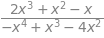

In [61]:
p1_expr = 2*x**3 + x**2 - x
p2_expr = x**3 - x**4 - 4*x**2

display( p1_expr )
display( p2_expr )
display( p1_expr+p2_expr )
display( p1_expr-p2_expr )
display( p1_expr*p2_expr )
display( p1_expr/p2_expr )

'degrees: 6'

'coefficients: [2, 1, -1]'

'value at 10: 2000090'

"factors: Poly(2*x**6 + x**2 - x, x, domain='ZZ')"

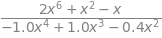

In [71]:
# Using the Poly class
p1 = sym.Poly(2*x**6 + x**2 - x)
# can use several methods on the polynomial object
display( f"degrees: {p1.degree()}" )
display( f"coefficients: {p1.coeffs()}" )

n = 10
display( f"value at {n}: {p1.eval(10)}" )
display( f"factors: {sym.factor(p1)}" )

# create a second polynomial
p2 = sym.Poly(x**3 - x**4 - .4*x**2)
display( p1+p2 ) # eq to p1_expr+p2_expr
display( p1-p2 ) # eq to p1_expr-p2_expr
display( p1*p2 ) # eq to p1_expr*p2_expr
display( p1/p2 ) # eq to p1_expr/p2_expr

# can also call the add,sub,mul,div method on the polynomial objects
display( p1.add(p2) )
display( p1.sub(p2) )
display( p1.mul(p2) )
display( p1.div(p2) )

### Roots of polynomials

In [73]:
coefs = [3, 2, -1]
roots = np.roots(coefs)
print(roots)

pn = 3*x**2 + 2*x -1
for i in roots:
    display(Math('\\text{At }x=%g, \\quad %s = %g' % (i, sym.latex(pn), pn.subs(x,i))))

[-1.          0.33333333]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

## The quadratic equation

<ipython-input-75-38a463db3339>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  M[i,j] = quadeq(a, b[i], c[j])


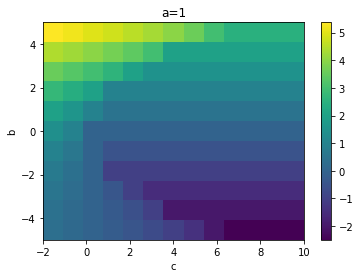

In [75]:
def quadeq(a, b, c):
    return (-b + np.lib.scimath.sqrt(b**2 - 4*a*c)) / (2*a)

a = 1
b = list(range(-5, 6))
c = list(range(-2, 11))
M = np.zeros((len(b), len(c)))
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        M[i,j] = quadeq(a, b[i], c[j])

plt.imshow(M, extent=[c[0],c[-1], b[0],b[-1]])
plt.title('a=%s'%a)
plt.xlabel('c')
plt.ylabel('b')
plt.colorbar()
plt.show()

# Lore ipsum

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed ut consectetur massa. Etiam malesuada ac libero et rhoncus. Pellentesque vel nulla sit amet turpis vehicula efficitur. Vivamus cursus elit quam, sollicitudin venenatis lectus porta in. Praesent tempus nunc in mi sollicitudin volutpat. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Maecenas lacus diam, ultrices at mauris eu, blandit maximus mauris. Quisque sagittis, lorem quis ornare scelerisque, turpis sem gravida purus, ut aliquet sapien mi eget felis. Ut tristique tempor bibendum. In nec arcu sed leo commodo imperdiet. Nam ac lacus elit. Vivamus efficitur urna nec dolor aliquet bibendum. Nunc scelerisque, justo ac suscipit vestibulum, lacus urna pharetra elit, vitae semper ipsum lacus quis neque. Nulla nec sem dapibus, egestas lorem eget, ultrices augue. Proin ullamcorper velit enim, vitae laoreet orci tristique sit amet. Donec sit amet odio orci.

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed ut consectetur massa. Etiam malesuada ac libero et rhoncus. Pellentesque vel nulla sit amet turpis vehicula efficitur. Vivamus cursus elit quam, sollicitudin venenatis lectus porta in. Praesent tempus nunc in mi sollicitudin volutpat. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas. Maecenas lacus diam, ultrices at mauris eu, blandit maximus mauris. Quisque sagittis, lorem quis ornare scelerisque, turpis sem gravida purus, ut aliquet sapien mi eget felis. Ut tristique tempor bibendum. In nec arcu sed leo commodo imperdiet. Nam ac lacus elit. Vivamus efficitur urna nec dolor aliquet bibendum. Nunc scelerisque, justo ac suscipit vestibulum, lacus urna pharetra elit, vitae semper ipsum lacus quis neque. Nulla nec sem dapibus, egestas lorem eget, ultrices augue. Proin ullamcorper velit enim, vitae laoreet orci tristique sit amet. Donec sit amet odio orci.